In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install quantstats --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=f4c3668d5f340d0a636e150fda9ba0d36a853d13a09ef63a98ea50602c6910a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-75_0u_ws/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for quantstats: filename=QuantStats-0.0.26-py2.py3-none-any.whl size=36979 sha256=bd04b93ca803f0218306ef7ae315599a71b2f0446ba6ca70fe7a3cddc2fc346c
  Stored in directory: /tmp/pip-ephem-wheel-cache-z78iz_qg/wheels/e2/29/82/c3cdde9eb76e7ed91e6aff057e4a53f52a7226c0eb09df90e0
Successfully built quantstats


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
import quantstats as qs

yf.pdr_override()

In [ ]:
symbols = ['SAPR11.SA', 'ENBR3.SA', 'BBAS3.SA', 'LOGG3.SA', 'ITSA4.SA', 'PSSA3.SA', 'TRIS3.SA', 'COGN3.SA', 'BOVA11.SA']

In [ ]:
portfolio = web.get_data_yahoo(symbols,start='2020-1-1')['Adj Close']

[*********************100%***********************]  9 of 9 completed


In [ ]:
#Fazer a coluna BOVA11 ser sempre a última
portfolio = portfolio[symbols]

In [ ]:
#Retornos
retornos = portfolio.pct_change().dropna()


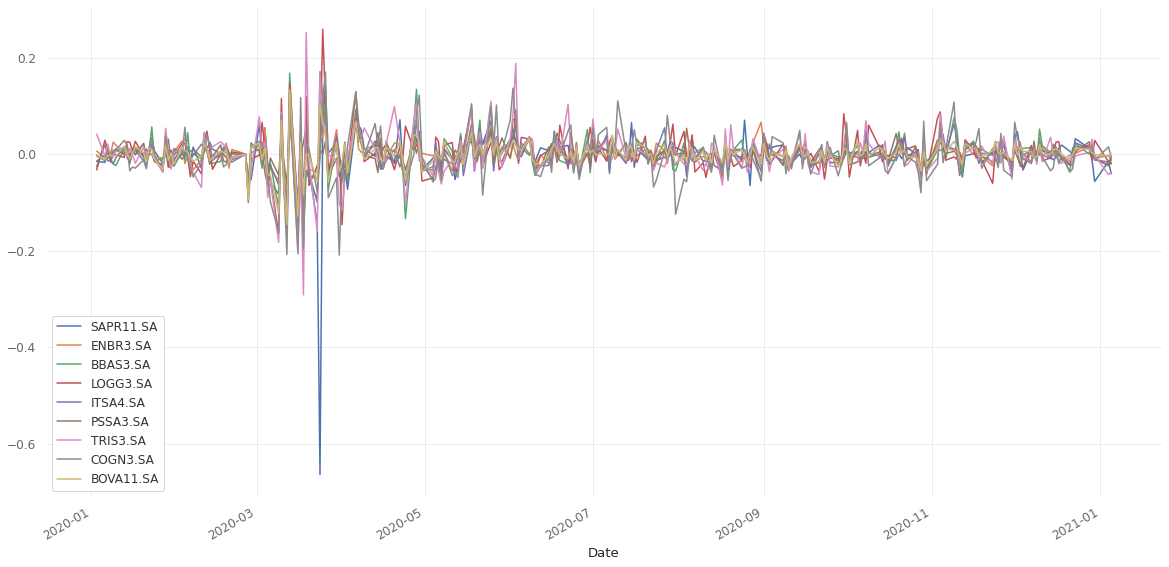

In [ ]:
retornos.plot(figsize=(20,10))

In [ ]:
#Correlacao para determinar os betas - Normalizados
retornos.corr()

,SAPR11.SA,ENBR3.SA,BBAS3.SA,LOGG3.SA,ITSA4.SA,PSSA3.SA,TRIS3.SA,COGN3.SA,BOVA11.SA
SAPR11.SA,1.000000,0.372491,0.164310,0.360672,0.246585,0.255638,0.241920,0.386483,0.231980
ENBR3.SA,0.372491,1.000000,0.711256,0.574499,0.708999,0.455198,0.566047,0.618804,0.774161
BBAS3.SA,0.164310,0.711256,1.000000,0.561325,0.876151,0.540468,0.668199,0.655589,0.873442
LOGG3.SA,0.360672,0.574499,0.561325,1.000000,0.548144,0.468581,0.633142,0.592458,0.679192
ITSA4.SA,0.246585,0.708999,0.876151,0.548144,1.000000,0.564454,0.583807,0.615631,0.841009
PSSA3.SA,0.255638,0.455198,0.540468,0.468581,0.564454,1.000000,0.543842,0.513925,0.590505
TRIS3.SA,0.241920,0.566047,0.668199,0.633142,0.583807,0.543842,1.000000,0.660967,0.691926
COGN3.SA,0.386483,0.618804,0.655589,0.592458,0.615631,0.513925,0.660967,1.000000,0.712129
BOVA11.SA,0.231980,0.774161,0.873442,0.679192,0.841009,0.590505,0.691926,0.712129,1.000000


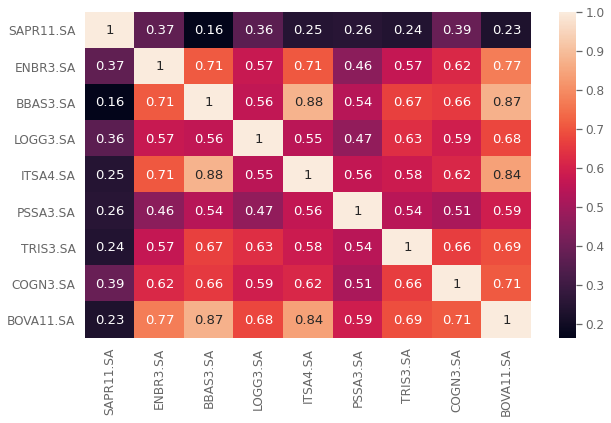

In [ ]:
sns.heatmap(retornos.corr(), annot=True)

In [ ]:
#Beta da carteira
betas = retornos.cov()/retornos['BOVA11.SA'].var()

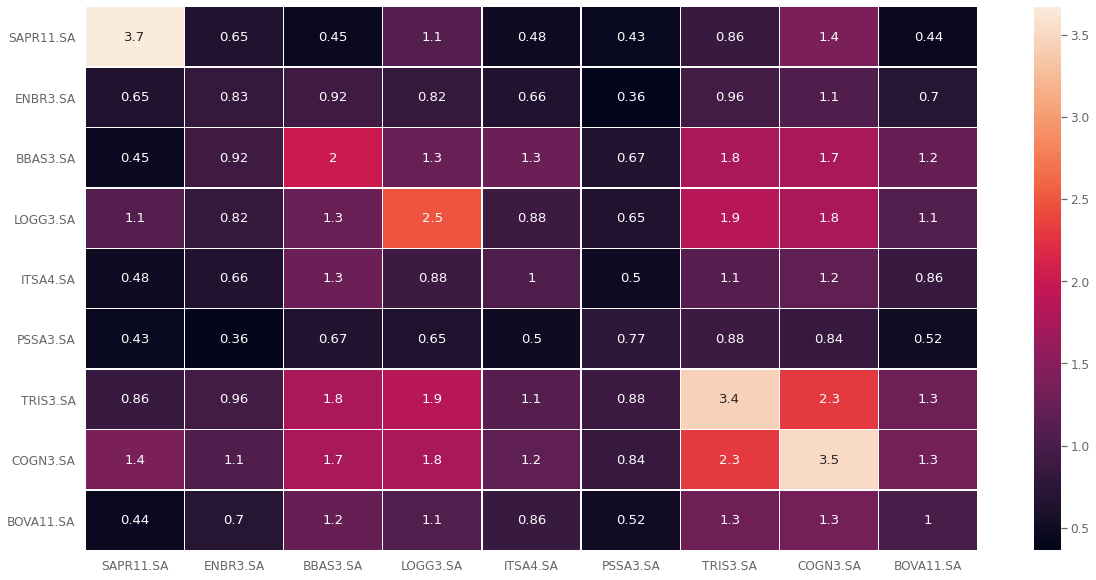

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(betas, annot=True, linewidths=.5)


In [ ]:
beta_carteira = (betas['BOVA11.SA'].sum() - 1) / ( len(betas.index)  - 1 )
beta_carteira

0.9316574201749586

In [ ]:
retornos.drop(columns='BOVA11.SA',inplace=True)

In [ ]:
retornos

,SAPR11.SA,ENBR3.SA,BBAS3.SA,LOGG3.SA,ITSA4.SA,PSSA3.SA,TRIS3.SA,COGN3.SA
Date,,,,,,,,
2020-01-03,-0.015108,0.006390,-0.001673,-0.032767,-0.014634,-0.025569,0.041534,-0.004098
2020-01-06,-0.016954,-0.007710,-0.013219,0.028763,-0.002122,0.019520,-0.004294,-0.013169
2020-01-07,0.008110,-0.005942,-0.007547,0.009630,-0.013466,-0.000628,0.020949,0.007506
2020-01-08,0.003972,-0.001379,-0.009125,-0.015077,-0.015086,-0.010678,-0.004225,-0.006623
2020-01-09,-0.003550,0.024862,-0.020338,-0.002499,-0.019694,0.003333,-0.005455,0.008333
...,...,...,...,...,...,...,...,...
2020-12-28,0.012279,0.014841,0.011048,0.018782,0.011140,0.025476,0.003373,0.000000
2020-12-29,-0.010346,0.000000,-0.005845,-0.011002,0.005932,0.000606,0.031093,0.019565
2020-12-30,-0.056597,-0.009077,-0.008180,0.028563,-0.011794,-0.010900,-0.001630,-0.012793


In [ ]:
#Outras medidas do Portfolio
retornos['Portfolio'] = retornos.mean(axis=1)

In [ ]:
retornos

,SAPR11.SA,ENBR3.SA,BBAS3.SA,LOGG3.SA,ITSA4.SA,PSSA3.SA,TRIS3.SA,COGN3.SA,Portfolio
Date,,,,,,,,,
2020-01-03,-0.015108,0.006390,-0.001673,-0.032767,-0.014634,-0.025569,0.041534,-0.004098,-0.005741
2020-01-06,-0.016954,-0.007710,-0.013219,0.028763,-0.002122,0.019520,-0.004294,-0.013169,-0.001148
2020-01-07,0.008110,-0.005942,-0.007547,0.009630,-0.013466,-0.000628,0.020949,0.007506,0.002327
2020-01-08,0.003972,-0.001379,-0.009125,-0.015077,-0.015086,-0.010678,-0.004225,-0.006623,-0.007278
2020-01-09,-0.003550,0.024862,-0.020338,-0.002499,-0.019694,0.003333,-0.005455,0.008333,-0.001876
...,...,...,...,...,...,...,...,...,...
2020-12-28,0.012279,0.014841,0.011048,0.018782,0.011140,0.025476,0.003373,0.000000,0.012117
2020-12-29,-0.010346,0.000000,-0.005845,-0.011002,0.005932,0.000606,0.031093,0.019565,0.003750
2020-12-30,-0.056597,-0.009077,-0.008180,0.028563,-0.011794,-0.010900,-0.001630,-0.012793,-0.010301


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


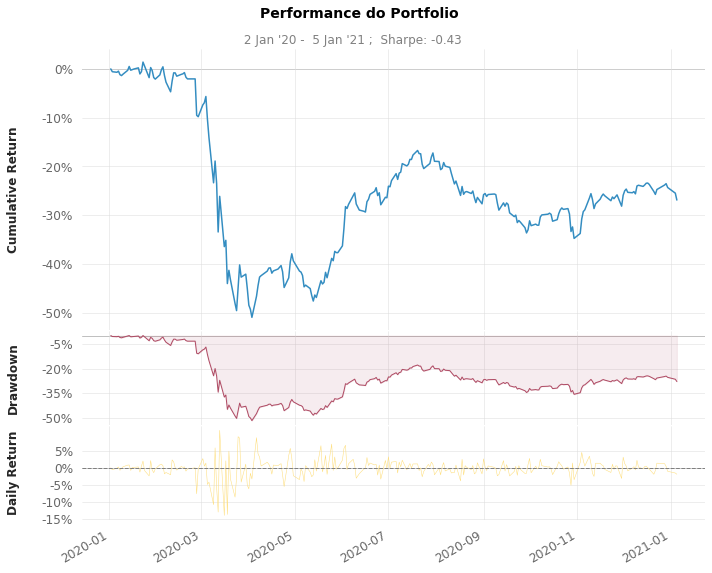

In [ ]:
qs.plots.snapshot(retornos['Portfolio'], title='Performance do Portfolio')


[Performance Metrics]

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2020-01-03  2020-01-03
End Period          2021-01-05  2021-01-05
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      98.0%

Cumulative Return   -26.89%     0.39%
CAGR%               -26.71%     0.39%
Sharpe              -0.43       0.23
Sortino             -0.56       0.3
Max Drawdown        -51.63%     nan%
Longest DD Days     -           -

Payoff Ratio        0.82        0.88
Profit Factor       0.92        1.05
Common Sense Ratio  0.85        0.86
CPC Index           0.39        0.48
Tail Ratio          0.93        0.82
Outlier Win Ratio   4.52        4.82
Outlier Loss Ratio  5.45        6.32

MTD                 -3.4%       -0.23%
3M                  7.75%       27.28%
6M                  -5.16%      23.86%
YTD                 -3.4%       -0.23%
1Y                  -26.47%     0.78%
3Y (ann.)           -26.71%     0.39%
5Y (ann.)       

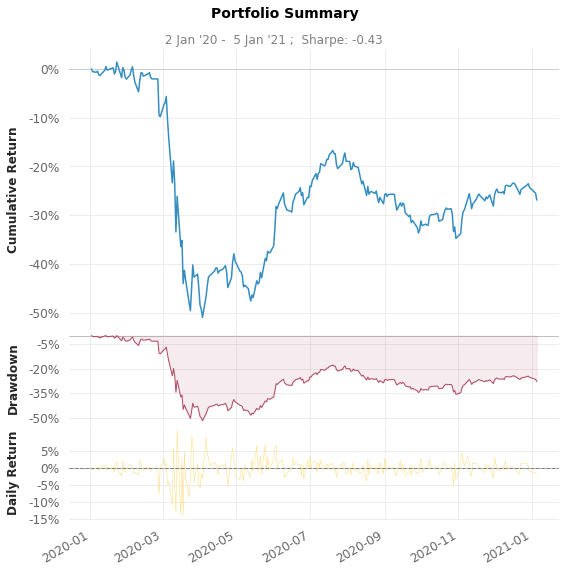

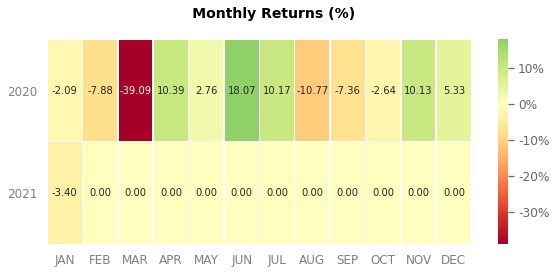

In [ ]:
qs.reports.basic(retornos['Portfolio'], 'BOVA11.SA')
